<a href="https://colab.research.google.com/github/Erick88santos/A.-M./blob/main/apresent/Body_Performance_Apresentacao2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Body Performance**

##Classificando a base de dados da [Kaggle](https://www.kaggle.com/datasets/kukuroo3/body-performance-data).
####**Alunos**:Erick Santos e Talles Ian

In [21]:

import numpy as np 
import pandas as pd # processamento de dados, E/S de arquivo CSV (por exemplo, pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#**Carregando os Dados**

In [22]:
df = pd.read_csv('bodyPerformance.csv')
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


#**Checando se existe alguma variável nula**

In [3]:
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

#**Fazendo a descrição dos dados**

In [4]:
df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


#**Correlação de pontuação de idade, altura e peso do gráfico**

In [ ]:
sns.pairplot(df[['age','height_cm', 'weight_kg']])

#**Usando o método do elbow para encontrar o número ideal de clusters pelo k-means**

In [7]:
wcss = {}
for k in range(1, 10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(df[['weight_kg','height_cm']])
    wcss[k] = km.inertia_

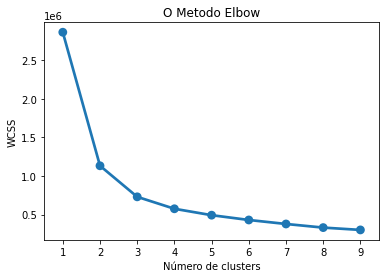

In [8]:
sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))
plt.title('O Metodo Elbow')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

#**KMeans Clustering with 4 Clusters**

In [9]:
Model = KMeans(n_clusters=4 ,init="k-means++", max_iter=1000)
Model.fit_predict(df[['weight_kg','height_cm']])

array([0, 2, 0, ..., 3, 2, 1], dtype=int32)

#**Achando os centróides**

In [10]:
centroids = Model.cluster_centers_
centroids

array([[ 73.69628604, 173.98899654],
       [ 63.89885027, 167.06106952],
       [ 53.28682648, 158.45542237],
       [ 87.18288864, 178.19349504]])

#**Anexar clusters aos dados originais**

In [11]:
df['Clusters'] = Model.labels_
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,Clusters
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,2
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0



#**Contando quanto cada classe tem**

In [12]:
df['Clusters'].value_counts()

0    4340
1    3727
2    3502
3    1824
Name: Clusters, dtype: int64

##**Vizualizando os dados**

Massa corporal por idade



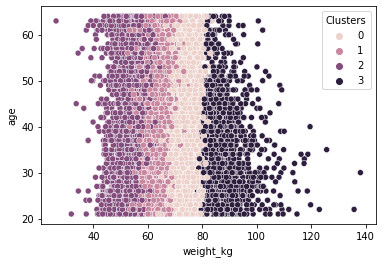

In [17]:
sns.scatterplot(x="weight_kg", y="age", hue= 'Clusters',  data=df, )

##**Vizualizando os dados**
Massa corporal por altura

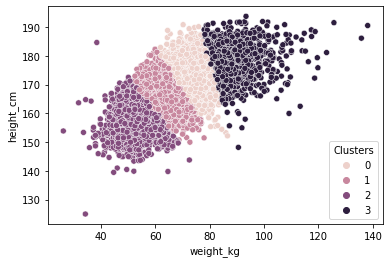

In [19]:
sns.scatterplot(x="weight_kg", y="height_cm", hue= 'Clusters',  data=df, )

##**Visualizar dados**

Idade e percentual de gordura.

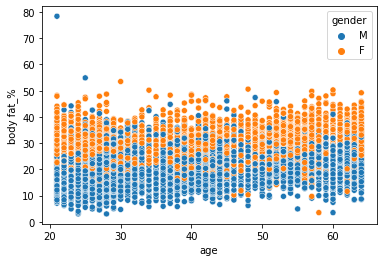

In [20]:
sns.scatterplot(x='age',y='body fat_%',data=df, hue='gender')
plt.show()